In [1]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [3]:
category = np.max(Y_train) + 1

In [4]:
print(category, '카테고리')
print(len(X_train))
print(len(X_test))
print(X_train[0])

46 카테고리
8982
2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = to_categorical(Y_train).astype('uint8')
y_test = to_categorical(Y_test).astype('uint8')

In [7]:
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 29s 3ms/sample - loss: 2.5796 - accuracy: 0.3565 - val_loss: 2.2566 - val_accuracy: 0.4702
Epoch 2/20
8982/8982 [==============================] - 28s 3ms/sample - loss: 2.0783 - accuracy: 0.4849 - val_loss: 1.9793 - val_accuracy: 0.5098
Epoch 3/20
8982/8982 [==============================] - 28s 3ms/sample - loss: 1.9007 - accuracy: 0.5014 - val_loss: 1.8811 - val_accuracy: 0.5191
Epoch 4/20
8982/8982 [==============================] - 28s 3ms/sample - loss: 1.7587 - accuracy: 0.5453 - val_loss: 1.7572 - val_accuracy: 0.5383
Epoch 5/20
8982/8982 [==============================] - 26s 3ms/sample - loss: 1.6973 - accuracy: 0.5568 - val_loss: 1.7135 - val_accuracy: 0.5614
Epoch 6/20
8982/8982 [==============================] - 26s 3ms/sample - loss: 1.6484 - accuracy: 0.5685 - val_loss: 1.7154 - val_accuracy: 0.5539
Epoch 7/20
8982/8982 [==============================] - 27s 3ms/sample

In [10]:
print(model.evaluate(x_test, y_test))

2246/2246 [==============================] - 2s 1ms/sample - loss: 1.2214 - accuracy: 0.7075
[1.2213817983467665, 0.70747995]


In [11]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

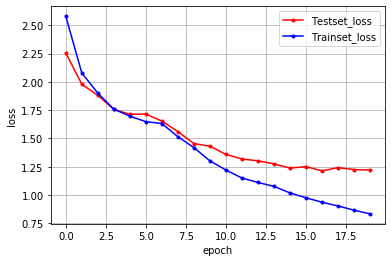

In [14]:
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()